In [1]:
import numpy as np
import tensorflow as tf

from tensorflow.keras import layers as tf_layers

%matplotlib inline
import matplotlib as mpl
from matplotlib import pyplot as plt

import time
from PIL import Image

# Dataset

In [2]:
(train_images, train_labels), (test_images, test_labels) = tf.keras.datasets.cifar10.load_data()

# Supposed to be commented out; uncomment only for testing
# train_size = 1000
# test_size = 100
# train_images, train_labels = train_images[:train_size], train_labels[:train_size]
# test_images, test_labels = test_images[:test_size], test_labels[:test_size]

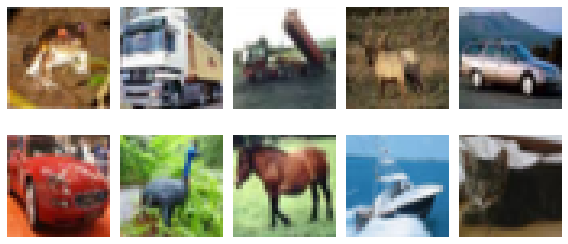

In [3]:
plt.rcParams['figure.figsize'] = [8, 4]

for i in range(10):
    plt.subplot(2, 5, i + 1)
    plt.imshow(train_images[i])
    plt.axis('off')
    
plt.tight_layout()
plt.savefig('./plots/sample_images.jpg')
plt.show()

In [4]:
train_labels_one_hot = tf.one_hot(train_labels[:, 0], 10)
test_labels_one_hot = tf.one_hot(test_labels[:, 0], 10)

train_labels_one_hot[10].numpy()

array([0., 0., 0., 0., 1., 0., 0., 0., 0., 0.], dtype=float32)

# Architecture

## Model 1

In [5]:
model_1 = tf.keras.Sequential(layers=[
    tf.keras.Input(shape=(32, 32, 3)),
    tf_layers.Lambda(lambda x: x / 255), # normalization
    tf_layers.Conv2D(5, (3, 3), padding='same', activation='sigmoid'),
    tf_layers.Conv2D(5, (3, 3), padding='same', activation='sigmoid'),
    tf_layers.MaxPooling2D(pool_size=(8, 8)),
    tf_layers.Flatten(),
    tf_layers.Dense(10, activation='softmax')
], name='model_1')

## Raw predictions

In [6]:
model_1.predict(train_images[:4])

array([[0.06742202, 0.16617595, 0.10621788, 0.15426287, 0.11776745,
        0.07227928, 0.0453818 , 0.04097754, 0.12819438, 0.10132083],
       [0.06928743, 0.16638817, 0.10812417, 0.15377139, 0.11950777,
        0.07174513, 0.04506159, 0.04112542, 0.1245659 , 0.10042307],
       [0.07082918, 0.16609618, 0.10878545, 0.14874266, 0.11967377,
        0.07118449, 0.04546   , 0.04169894, 0.12388342, 0.10364588],
       [0.06804579, 0.1635418 , 0.11022403, 0.15187307, 0.11794385,
        0.07320039, 0.04561224, 0.04100255, 0.12633337, 0.10222291]],
      dtype=float32)

## Weights count

In [7]:
model_1.build((1, 32, 32, 3))
model_1.count_params()

1180

## Optimization

In [8]:
BATCH_SIZE = 256
EPOCHS = 150

def compile_and_fit(model, epochs=None):
    model.compile(optimizer=tf.keras.optimizers.SGD(learning_rate=0.001, momentum=0.9), 
                  loss=tf.keras.losses.BinaryCrossentropy(),
                  metrics=[tf.keras.metrics.CategoricalAccuracy()])

    if epochs is None:
        epochs = EPOCHS
    start = time.time()
    model_history = model.fit(train_images, 
                              train_labels_one_hot, 
                              batch_size=BATCH_SIZE, 
                              epochs=epochs, 
                              validation_data=(test_images, test_labels_one_hot))
    end = time.time()
    return model_history, end - start

In [9]:
model_1_history, model_1_elapsed_time = compile_and_fit(model_1)

Epoch 1/150
196/196 [==============================] - 2s 10ms/step - loss: 0.6158 - categorical_accuracy: 0.1066 - val_loss: 0.4033 - val_categorical_accuracy: 0.1168
Epoch 2/150
196/196 [==============================] - 2s 8ms/step - loss: 0.3585 - categorical_accuracy: 0.1162 - val_loss: 0.3355 - val_categorical_accuracy: 0.1127
Epoch 3/150
196/196 [==============================] - 2s 8ms/step - loss: 0.3298 - categorical_accuracy: 0.1100 - val_loss: 0.3266 - val_categorical_accuracy: 0.1068
Epoch 4/150
196/196 [==============================] - 2s 8ms/step - loss: 0.3257 - categorical_accuracy: 0.1081 - val_loss: 0.3252 - val_categorical_accuracy: 0.1101
Epoch 5/150
196/196 [==============================] - 1s 7ms/step - loss: 0.3250 - categorical_accuracy: 0.1110 - val_loss: 0.3249 - val_categorical_accuracy: 0.1220
Epoch 6/150
196/196 [==============================] - 1s 8ms/step - loss: 0.3249 - categorical_accuracy: 0.1250 - val_loss: 0.3249 - val_categorical_accuracy: 0.13

Epoch 50/150
196/196 [==============================] - 1s 8ms/step - loss: 0.3247 - categorical_accuracy: 0.1578 - val_loss: 0.3247 - val_categorical_accuracy: 0.1625
Epoch 51/150
196/196 [==============================] - 1s 8ms/step - loss: 0.3247 - categorical_accuracy: 0.1485 - val_loss: 0.3247 - val_categorical_accuracy: 0.1587
Epoch 52/150
196/196 [==============================] - 1s 7ms/step - loss: 0.3247 - categorical_accuracy: 0.1513 - val_loss: 0.3247 - val_categorical_accuracy: 0.1563
Epoch 53/150
196/196 [==============================] - 1s 8ms/step - loss: 0.3247 - categorical_accuracy: 0.1553 - val_loss: 0.3247 - val_categorical_accuracy: 0.1629
Epoch 54/150
196/196 [==============================] - 1s 7ms/step - loss: 0.3247 - categorical_accuracy: 0.1506 - val_loss: 0.3247 - val_categorical_accuracy: 0.1591
Epoch 55/150
196/196 [==============================] - 1s 8ms/step - loss: 0.3247 - categorical_accuracy: 0.1524 - val_loss: 0.3247 - val_categorical_accuracy:

Epoch 99/150
196/196 [==============================] - 2s 8ms/step - loss: 0.3245 - categorical_accuracy: 0.1641 - val_loss: 0.3245 - val_categorical_accuracy: 0.1711
Epoch 100/150
196/196 [==============================] - 1s 7ms/step - loss: 0.3245 - categorical_accuracy: 0.1663 - val_loss: 0.3245 - val_categorical_accuracy: 0.1699
Epoch 101/150
196/196 [==============================] - 1s 7ms/step - loss: 0.3245 - categorical_accuracy: 0.1652 - val_loss: 0.3245 - val_categorical_accuracy: 0.1715
Epoch 102/150
196/196 [==============================] - 1s 7ms/step - loss: 0.3245 - categorical_accuracy: 0.1646 - val_loss: 0.3244 - val_categorical_accuracy: 0.1683
Epoch 103/150
196/196 [==============================] - 1s 7ms/step - loss: 0.3245 - categorical_accuracy: 0.1657 - val_loss: 0.3244 - val_categorical_accuracy: 0.1719
Epoch 104/150
196/196 [==============================] - 1s 7ms/step - loss: 0.3245 - categorical_accuracy: 0.1633 - val_loss: 0.3244 - val_categorical_accu

196/196 [==============================] - 1s 7ms/step - loss: 0.3242 - categorical_accuracy: 0.1727 - val_loss: 0.3241 - val_categorical_accuracy: 0.1768
Epoch 148/150
196/196 [==============================] - 1s 7ms/step - loss: 0.3242 - categorical_accuracy: 0.1751 - val_loss: 0.3241 - val_categorical_accuracy: 0.1769
Epoch 149/150
196/196 [==============================] - 1s 7ms/step - loss: 0.3242 - categorical_accuracy: 0.1723 - val_loss: 0.3241 - val_categorical_accuracy: 0.1781
Epoch 150/150
196/196 [==============================] - 1s 7ms/step - loss: 0.3242 - categorical_accuracy: 0.1746 - val_loss: 0.3241 - val_categorical_accuracy: 0.1784


In [10]:
print(f'Elapsed time: {model_1_elapsed_time:.2f} s')
model_1_history.history.keys()

Elapsed time: 221.29 s


dict_keys(['loss', 'categorical_accuracy', 'val_loss', 'val_categorical_accuracy'])

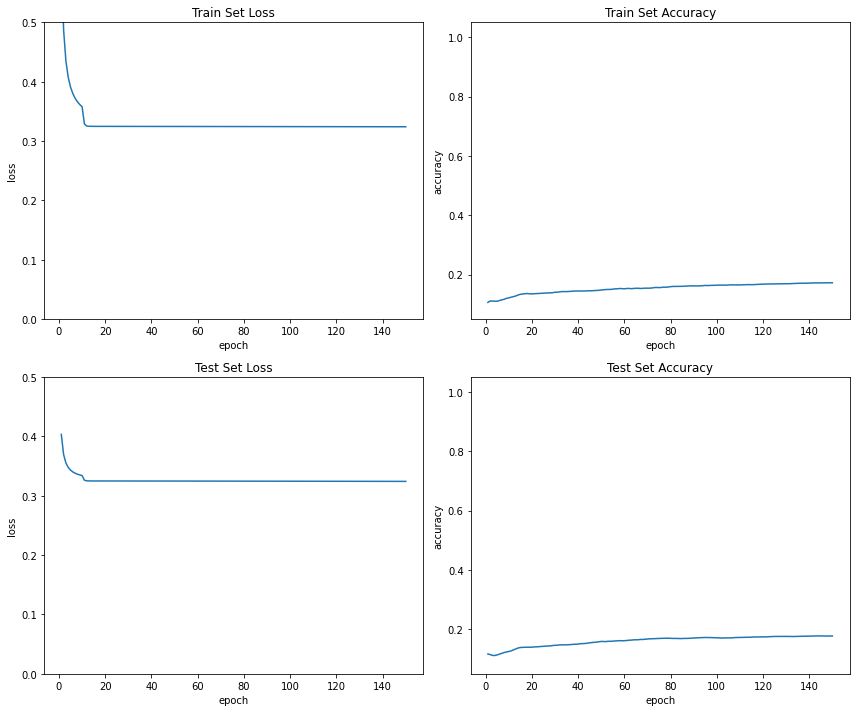

In [11]:
def _moving_average(arr, n):
    cumsum = np.cumsum(np.concatenate(([0] * n, arr)))
    return (cumsum[n:] - cumsum[:-n]) / np.concatenate((np.arange(1, n + 1), np.full((len(arr) - n,), n)))

def _plot_score_vs_epochs(sub_idx, x, y, xlabel, ylabel, title=None, y_min=None, y_max=None, ma=10):
    y = _moving_average(y, ma)
    plt.subplot(2, 2, sub_idx)
    plt.plot(x, y)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    if title is not None:
        plt.title(title)
    if y_min is not None and y_max is not None:
        plt.ylim(y_min, y_max)
    
def plot_all_score_vs_epochs(model_history, model_name, epochs=None, ma=10):
    plt.rcParams['figure.figsize'] = [12, 10]
    
    if epochs is None:
        epochs = EPOCHS
    x = np.arange(1, epochs + 1)  
    
    _plot_score_vs_epochs(1, x, model_history.history['loss'], 'epoch', 'loss',
                          title='Train Set Loss',     y_min=0.00, y_max=0.50, ma=ma)
    _plot_score_vs_epochs(2, x, model_history.history['categorical_accuracy'], 'epoch', 'accuracy',
                          title='Train Set Accuracy', y_min=0.05, y_max=1.05, ma=ma)
    _plot_score_vs_epochs(3, x, model_history.history['val_loss'], 'epoch', 'loss',
                          title='Test Set Loss',      y_min=0.00, y_max=0.50, ma=ma)
    _plot_score_vs_epochs(4, x, model_history.history['val_categorical_accuracy'], 'epoch', 'accuracy',
                          title='Test Set Accuracy',  y_min=0.05, y_max=1.05, ma=ma)
    plt.tight_layout()
    plt.savefig(f'plots/{model_name}_plots.jpg')
    plt.show()
    
plot_all_score_vs_epochs(model_1_history, 'model_1')

## Predictions

In [12]:
model_1.predict(train_images[:4])

array([[0.10115077, 0.10041513, 0.09692085, 0.10276248, 0.10430776,
        0.09903386, 0.09986223, 0.09823465, 0.10127471, 0.09603759],
       [0.10440031, 0.10427026, 0.10104266, 0.10250272, 0.10275894,
        0.09478779, 0.09573077, 0.0981484 , 0.0997119 , 0.0966463 ],
       [0.10230052, 0.10484778, 0.10193463, 0.09782798, 0.09812929,
        0.09058148, 0.09454165, 0.09998884, 0.09881873, 0.11102912],
       [0.09715562, 0.09863862, 0.10138866, 0.10260669, 0.10381465,
        0.10123373, 0.09947239, 0.09733292, 0.10020626, 0.09815052]],
      dtype=float32)

# Evolution

## Model 2
- Increased the convolution filters number from 5 to 20

In [13]:
model_2 = tf.keras.Sequential(layers=[
    tf.keras.Input(shape=(32, 32, 3)),
    tf_layers.Lambda(lambda x: x / 255), # normalization
    tf_layers.Conv2D(20, (3, 3), padding='same', activation='sigmoid'),
    tf_layers.Conv2D(20, (3, 3), padding='same', activation='sigmoid'),
    tf_layers.MaxPooling2D(pool_size=(8, 8)),
    tf_layers.Flatten(),
    tf_layers.Dense(10, activation='softmax')
], name='model_2')

model_2_history, model_2_elapsed_time = compile_and_fit(model_2)

Epoch 1/150
196/196 [==============================] - 3s 14ms/step - loss: 0.4125 - categorical_accuracy: 0.0995 - val_loss: 0.3269 - val_categorical_accuracy: 0.0980
Epoch 2/150
196/196 [==============================] - 2s 12ms/step - loss: 0.3255 - categorical_accuracy: 0.1003 - val_loss: 0.3251 - val_categorical_accuracy: 0.0857
Epoch 3/150
196/196 [==============================] - 2s 12ms/step - loss: 0.3251 - categorical_accuracy: 0.0850 - val_loss: 0.3251 - val_categorical_accuracy: 0.0924
Epoch 4/150
196/196 [==============================] - 2s 12ms/step - loss: 0.3251 - categorical_accuracy: 0.0949 - val_loss: 0.3251 - val_categorical_accuracy: 0.0881
Epoch 5/150
196/196 [==============================] - 2s 12ms/step - loss: 0.3251 - categorical_accuracy: 0.0915 - val_loss: 0.3251 - val_categorical_accuracy: 0.0828
Epoch 6/150
196/196 [==============================] - 2s 12ms/step - loss: 0.3251 - categorical_accuracy: 0.0887 - val_loss: 0.3251 - val_categorical_accuracy:

196/196 [==============================] - 2s 12ms/step - loss: 0.3249 - categorical_accuracy: 0.1344 - val_loss: 0.3249 - val_categorical_accuracy: 0.1247
Epoch 50/150
196/196 [==============================] - 2s 12ms/step - loss: 0.3249 - categorical_accuracy: 0.1099 - val_loss: 0.3248 - val_categorical_accuracy: 0.1305
Epoch 51/150
196/196 [==============================] - 2s 12ms/step - loss: 0.3249 - categorical_accuracy: 0.1329 - val_loss: 0.3248 - val_categorical_accuracy: 0.1142
Epoch 52/150
196/196 [==============================] - 2s 12ms/step - loss: 0.3249 - categorical_accuracy: 0.1321 - val_loss: 0.3248 - val_categorical_accuracy: 0.1154
Epoch 53/150
196/196 [==============================] - 2s 12ms/step - loss: 0.3249 - categorical_accuracy: 0.1222 - val_loss: 0.3248 - val_categorical_accuracy: 0.1379
Epoch 54/150
196/196 [==============================] - 2s 12ms/step - loss: 0.3248 - categorical_accuracy: 0.1370 - val_loss: 0.3248 - val_categorical_accuracy: 0.1280

196/196 [==============================] - 2s 12ms/step - loss: 0.3245 - categorical_accuracy: 0.1697 - val_loss: 0.3245 - val_categorical_accuracy: 0.1645
Epoch 98/150
196/196 [==============================] - 2s 12ms/step - loss: 0.3245 - categorical_accuracy: 0.1728 - val_loss: 0.3245 - val_categorical_accuracy: 0.1646
Epoch 99/150
196/196 [==============================] - 2s 12ms/step - loss: 0.3245 - categorical_accuracy: 0.1508 - val_loss: 0.3245 - val_categorical_accuracy: 0.1721
Epoch 100/150
196/196 [==============================] - 2s 13ms/step - loss: 0.3245 - categorical_accuracy: 0.1767 - val_loss: 0.3245 - val_categorical_accuracy: 0.1961
Epoch 101/150
196/196 [==============================] - 2s 12ms/step - loss: 0.3245 - categorical_accuracy: 0.1866 - val_loss: 0.3245 - val_categorical_accuracy: 0.1859
Epoch 102/150
196/196 [==============================] - 2s 12ms/step - loss: 0.3245 - categorical_accuracy: 0.1787 - val_loss: 0.3245 - val_categorical_accuracy: 0.1

196/196 [==============================] - 2s 12ms/step - loss: 0.3239 - categorical_accuracy: 0.1813 - val_loss: 0.3239 - val_categorical_accuracy: 0.1903
Epoch 146/150
196/196 [==============================] - 2s 12ms/step - loss: 0.3239 - categorical_accuracy: 0.1906 - val_loss: 0.3238 - val_categorical_accuracy: 0.1939
Epoch 147/150
196/196 [==============================] - 3s 13ms/step - loss: 0.3239 - categorical_accuracy: 0.1931 - val_loss: 0.3238 - val_categorical_accuracy: 0.1949
Epoch 148/150
196/196 [==============================] - 2s 12ms/step - loss: 0.3239 - categorical_accuracy: 0.1969 - val_loss: 0.3238 - val_categorical_accuracy: 0.1943
Epoch 149/150
196/196 [==============================] - 2s 12ms/step - loss: 0.3238 - categorical_accuracy: 0.1976 - val_loss: 0.3238 - val_categorical_accuracy: 0.1770
Epoch 150/150
196/196 [==============================] - 2s 12ms/step - loss: 0.3238 - categorical_accuracy: 0.1880 - val_loss: 0.3238 - val_categorical_accuracy: 0

In [14]:
model_2.count_params()

7390

Elapsed time: 364.77 s


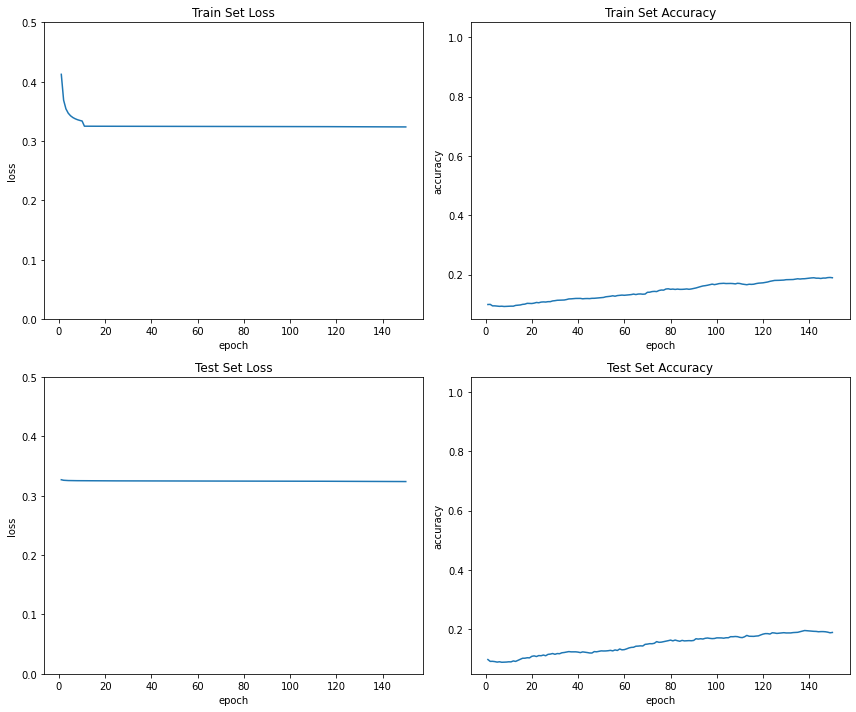

In [15]:
print(f'Elapsed time: {(model_2_elapsed_time):.2f} s')
plot_all_score_vs_epochs(model_2_history, 'model_2', ma=10)

## Model 3.1
- two convolution blocks (20, 40) instead of one (20)

In [16]:
def convolution_block(n_filters, activation='relu'):
    return [tf_layers.Conv2D(n_filters, (3, 3), padding='same', activation=activation),
            tf_layers.Conv2D(n_filters, (3, 3), padding='same', activation=activation),
            tf_layers.MaxPooling2D(pool_size=(2, 2))]

In [17]:
model_3_1 = tf.keras.Sequential(layers=[
    tf.keras.Input(shape=(32, 32, 3)),
    tf_layers.Lambda(lambda x: x / 255), # normalization
    *convolution_block(20, 'sigmoid'),
    *convolution_block(40, 'sigmoid'),
    tf_layers.Flatten(),
    tf_layers.Dense(10, activation='softmax')
], name='model_3_1')

model_3_1_history, model_3_1_elapsed_time = compile_and_fit(model_3_1, epochs=15)

Epoch 1/15
196/196 [==============================] - 5s 22ms/step - loss: 0.3392 - categorical_accuracy: 0.0998 - val_loss: 0.3251 - val_categorical_accuracy: 0.1000
Epoch 2/15
196/196 [==============================] - 4s 20ms/step - loss: 0.3252 - categorical_accuracy: 0.0968 - val_loss: 0.3252 - val_categorical_accuracy: 0.1000
Epoch 3/15
196/196 [==============================] - 4s 21ms/step - loss: 0.3252 - categorical_accuracy: 0.0977 - val_loss: 0.3251 - val_categorical_accuracy: 0.1000
Epoch 4/15
196/196 [==============================] - 4s 20ms/step - loss: 0.3252 - categorical_accuracy: 0.0985 - val_loss: 0.3251 - val_categorical_accuracy: 0.1000
Epoch 5/15
196/196 [==============================] - 4s 20ms/step - loss: 0.3252 - categorical_accuracy: 0.0984 - val_loss: 0.3251 - val_categorical_accuracy: 0.1000
Epoch 6/15
196/196 [==============================] - 4s 20ms/step - loss: 0.3252 - categorical_accuracy: 0.0984 - val_loss: 0.3251 - val_categorical_accuracy: 0.100

Elapsed time: 61.07 s


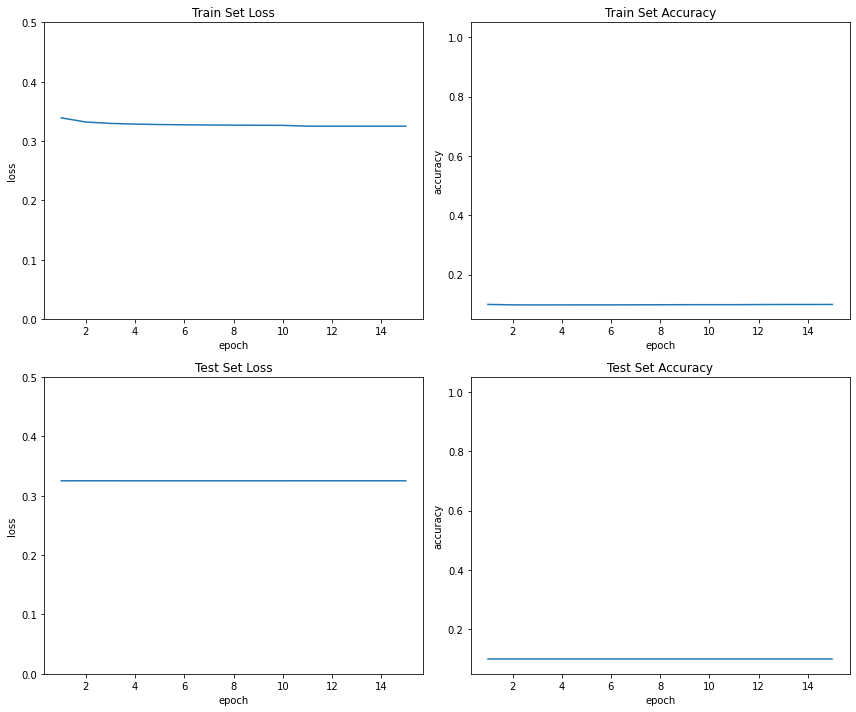

In [18]:
print(f'Elapsed time: {(model_3_1_elapsed_time):.2f} s')
plot_all_score_vs_epochs(model_3_1_history, 'model_3_1', epochs=15)

# Model 3.2
- ReLU instead of sigmoid in Conv2D

In [19]:
model_3_2 = tf.keras.Sequential(layers=[
    tf.keras.Input(shape=(32, 32, 3)),
    tf_layers.Lambda(lambda x: x / 255), # normalization
    *convolution_block(20),
    *convolution_block(40),
    tf_layers.Flatten(),
    tf_layers.Dense(10, activation='sigmoid')
], name='model_3_2')

model_3_2_history, model_3_2_elapsed_time = compile_and_fit(model_3_2)

Epoch 1/150
196/196 [==============================] - 4s 21ms/step - loss: 0.4016 - categorical_accuracy: 0.1023 - val_loss: 0.3315 - val_categorical_accuracy: 0.1284
Epoch 2/150
196/196 [==============================] - 4s 18ms/step - loss: 0.3300 - categorical_accuracy: 0.1350 - val_loss: 0.3283 - val_categorical_accuracy: 0.1549
Epoch 3/150
196/196 [==============================] - 4s 18ms/step - loss: 0.3272 - categorical_accuracy: 0.1549 - val_loss: 0.3259 - val_categorical_accuracy: 0.1677
Epoch 4/150
196/196 [==============================] - 4s 18ms/step - loss: 0.3250 - categorical_accuracy: 0.1712 - val_loss: 0.3239 - val_categorical_accuracy: 0.1697
Epoch 5/150
196/196 [==============================] - 4s 18ms/step - loss: 0.3230 - categorical_accuracy: 0.1779 - val_loss: 0.3221 - val_categorical_accuracy: 0.1849
Epoch 6/150
196/196 [==============================] - 4s 18ms/step - loss: 0.3212 - categorical_accuracy: 0.1857 - val_loss: 0.3204 - val_categorical_accuracy:

196/196 [==============================] - 4s 20ms/step - loss: 0.2660 - categorical_accuracy: 0.3818 - val_loss: 0.2649 - val_categorical_accuracy: 0.3810
Epoch 50/150
196/196 [==============================] - 4s 18ms/step - loss: 0.2653 - categorical_accuracy: 0.3831 - val_loss: 0.2642 - val_categorical_accuracy: 0.3828
Epoch 51/150
196/196 [==============================] - 4s 20ms/step - loss: 0.2644 - categorical_accuracy: 0.3873 - val_loss: 0.2640 - val_categorical_accuracy: 0.3809
Epoch 52/150
196/196 [==============================] - 4s 18ms/step - loss: 0.2634 - categorical_accuracy: 0.3880 - val_loss: 0.2627 - val_categorical_accuracy: 0.3895
Epoch 53/150
196/196 [==============================] - 4s 19ms/step - loss: 0.2627 - categorical_accuracy: 0.3914 - val_loss: 0.2615 - val_categorical_accuracy: 0.3930
Epoch 54/150
196/196 [==============================] - 4s 19ms/step - loss: 0.2618 - categorical_accuracy: 0.3949 - val_loss: 0.2606 - val_categorical_accuracy: 0.3929

196/196 [==============================] - 4s 18ms/step - loss: 0.2319 - categorical_accuracy: 0.4852 - val_loss: 0.2323 - val_categorical_accuracy: 0.4868
Epoch 98/150
196/196 [==============================] - 3s 18ms/step - loss: 0.2315 - categorical_accuracy: 0.4862 - val_loss: 0.2312 - val_categorical_accuracy: 0.4892
Epoch 99/150
196/196 [==============================] - 3s 18ms/step - loss: 0.2309 - categorical_accuracy: 0.4886 - val_loss: 0.2312 - val_categorical_accuracy: 0.4860
Epoch 100/150
196/196 [==============================] - 4s 18ms/step - loss: 0.2305 - categorical_accuracy: 0.4906 - val_loss: 0.2306 - val_categorical_accuracy: 0.4918
Epoch 101/150
196/196 [==============================] - 4s 19ms/step - loss: 0.2301 - categorical_accuracy: 0.4915 - val_loss: 0.2303 - val_categorical_accuracy: 0.4888
Epoch 102/150
196/196 [==============================] - 4s 18ms/step - loss: 0.2297 - categorical_accuracy: 0.4919 - val_loss: 0.2308 - val_categorical_accuracy: 0.4

196/196 [==============================] - 4s 18ms/step - loss: 0.2152 - categorical_accuracy: 0.5375 - val_loss: 0.2206 - val_categorical_accuracy: 0.5193
Epoch 146/150
196/196 [==============================] - 4s 18ms/step - loss: 0.2150 - categorical_accuracy: 0.5380 - val_loss: 0.2177 - val_categorical_accuracy: 0.5301
Epoch 147/150
196/196 [==============================] - 4s 19ms/step - loss: 0.2147 - categorical_accuracy: 0.5396 - val_loss: 0.2167 - val_categorical_accuracy: 0.5321
Epoch 148/150
196/196 [==============================] - 4s 18ms/step - loss: 0.2146 - categorical_accuracy: 0.5386 - val_loss: 0.2172 - val_categorical_accuracy: 0.5289
Epoch 149/150
196/196 [==============================] - 4s 19ms/step - loss: 0.2142 - categorical_accuracy: 0.5406 - val_loss: 0.2167 - val_categorical_accuracy: 0.5324
Epoch 150/150
196/196 [==============================] - 4s 18ms/step - loss: 0.2137 - categorical_accuracy: 0.5431 - val_loss: 0.2169 - val_categorical_accuracy: 0

Elapsed time: 549.11 s


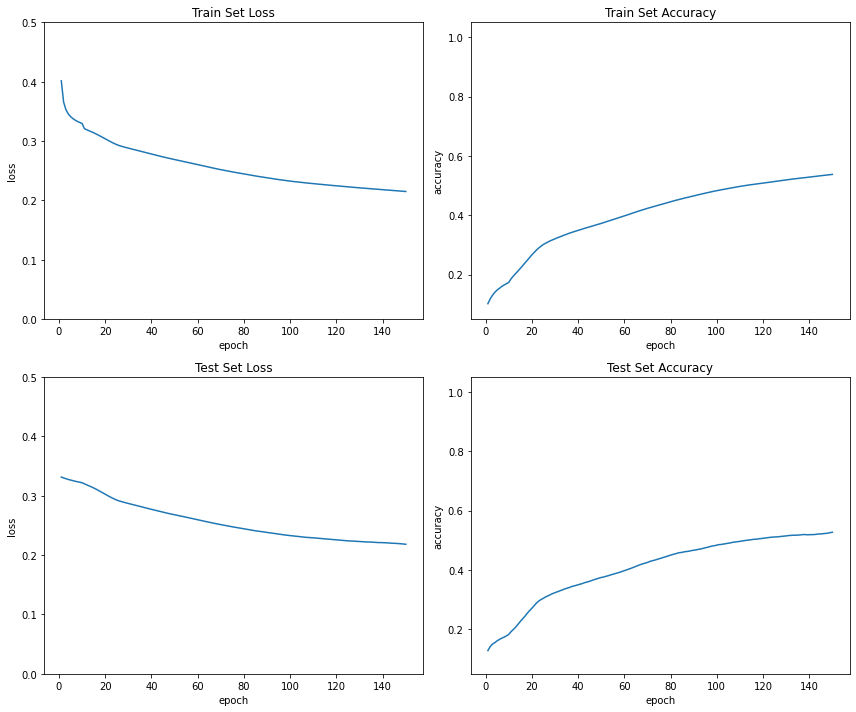

In [20]:
print(f'Elapsed time: {(model_3_2_elapsed_time):.2f} s')
plot_all_score_vs_epochs(model_3_2_history, 'model_3_2')

## Model 3.3
- two next blocks: (20, 40, 80, 160)

In [21]:
model_3_3 = tf.keras.Sequential(layers=[
    tf.keras.Input(shape=(32, 32, 3)),
    tf_layers.Lambda(lambda x: x / 255), # normalization
    *convolution_block(20),
    *convolution_block(40),
    *convolution_block(80),
    *convolution_block(160),
    tf_layers.Flatten(),
    tf_layers.Dense(10, activation='softmax')
], name='model_3_3')

model_3_3_history, model_3_3_elapsed_time = compile_and_fit(model_3_3)

Epoch 1/150
196/196 [==============================] - 7s 30ms/step - loss: 0.6468 - categorical_accuracy: 0.0941 - val_loss: 0.5260 - val_categorical_accuracy: 0.0999
Epoch 2/150
196/196 [==============================] - 5s 28ms/step - loss: 0.3458 - categorical_accuracy: 0.1101 - val_loss: 0.3288 - val_categorical_accuracy: 0.1329
Epoch 3/150
196/196 [==============================] - 5s 28ms/step - loss: 0.3283 - categorical_accuracy: 0.1288 - val_loss: 0.3277 - val_categorical_accuracy: 0.1332
Epoch 4/150
196/196 [==============================] - 5s 27ms/step - loss: 0.3274 - categorical_accuracy: 0.1361 - val_loss: 0.3270 - val_categorical_accuracy: 0.1599
Epoch 5/150
196/196 [==============================] - 5s 24ms/step - loss: 0.3268 - categorical_accuracy: 0.1573 - val_loss: 0.3264 - val_categorical_accuracy: 0.1655
Epoch 6/150
196/196 [==============================] - 5s 27ms/step - loss: 0.3262 - categorical_accuracy: 0.1646 - val_loss: 0.3259 - val_categorical_accuracy:

196/196 [==============================] - 5s 28ms/step - loss: 0.2834 - categorical_accuracy: 0.3241 - val_loss: 0.2850 - val_categorical_accuracy: 0.3049
Epoch 50/150
196/196 [==============================] - 5s 28ms/step - loss: 0.2823 - categorical_accuracy: 0.3251 - val_loss: 0.2825 - val_categorical_accuracy: 0.3233
Epoch 51/150
196/196 [==============================] - 5s 27ms/step - loss: 0.2808 - categorical_accuracy: 0.3317 - val_loss: 0.2793 - val_categorical_accuracy: 0.3364
Epoch 52/150
196/196 [==============================] - 6s 29ms/step - loss: 0.2801 - categorical_accuracy: 0.3363 - val_loss: 0.2817 - val_categorical_accuracy: 0.3354
Epoch 53/150
196/196 [==============================] - 6s 30ms/step - loss: 0.2791 - categorical_accuracy: 0.3383 - val_loss: 0.2790 - val_categorical_accuracy: 0.3358
Epoch 54/150
196/196 [==============================] - 5s 27ms/step - loss: 0.2779 - categorical_accuracy: 0.3446 - val_loss: 0.2767 - val_categorical_accuracy: 0.3409

196/196 [==============================] - 5s 28ms/step - loss: 0.2351 - categorical_accuracy: 0.4648 - val_loss: 0.2394 - val_categorical_accuracy: 0.4524
Epoch 98/150
196/196 [==============================] - 5s 28ms/step - loss: 0.2348 - categorical_accuracy: 0.4681 - val_loss: 0.2381 - val_categorical_accuracy: 0.4551
Epoch 99/150
196/196 [==============================] - 5s 28ms/step - loss: 0.2341 - categorical_accuracy: 0.4691 - val_loss: 0.2368 - val_categorical_accuracy: 0.4570
Epoch 100/150
196/196 [==============================] - 5s 28ms/step - loss: 0.2329 - categorical_accuracy: 0.4733 - val_loss: 0.2376 - val_categorical_accuracy: 0.4571
Epoch 101/150
196/196 [==============================] - 5s 28ms/step - loss: 0.2327 - categorical_accuracy: 0.4743 - val_loss: 0.2376 - val_categorical_accuracy: 0.4620
Epoch 102/150
196/196 [==============================] - 5s 28ms/step - loss: 0.2319 - categorical_accuracy: 0.4785 - val_loss: 0.2379 - val_categorical_accuracy: 0.4

196/196 [==============================] - 5s 28ms/step - loss: 0.2070 - categorical_accuracy: 0.5504 - val_loss: 0.2225 - val_categorical_accuracy: 0.5048
Epoch 146/150
196/196 [==============================] - 5s 27ms/step - loss: 0.2056 - categorical_accuracy: 0.5536 - val_loss: 0.2203 - val_categorical_accuracy: 0.5157
Epoch 147/150
196/196 [==============================] - 5s 27ms/step - loss: 0.2049 - categorical_accuracy: 0.5552 - val_loss: 0.2209 - val_categorical_accuracy: 0.5065
Epoch 148/150
196/196 [==============================] - 5s 27ms/step - loss: 0.2051 - categorical_accuracy: 0.5557 - val_loss: 0.2200 - val_categorical_accuracy: 0.5083
Epoch 149/150
196/196 [==============================] - 5s 28ms/step - loss: 0.2044 - categorical_accuracy: 0.5585 - val_loss: 0.2182 - val_categorical_accuracy: 0.5155
Epoch 150/150
196/196 [==============================] - 5s 28ms/step - loss: 0.2042 - categorical_accuracy: 0.5574 - val_loss: 0.2202 - val_categorical_accuracy: 0

Elapsed time: 821.06 s


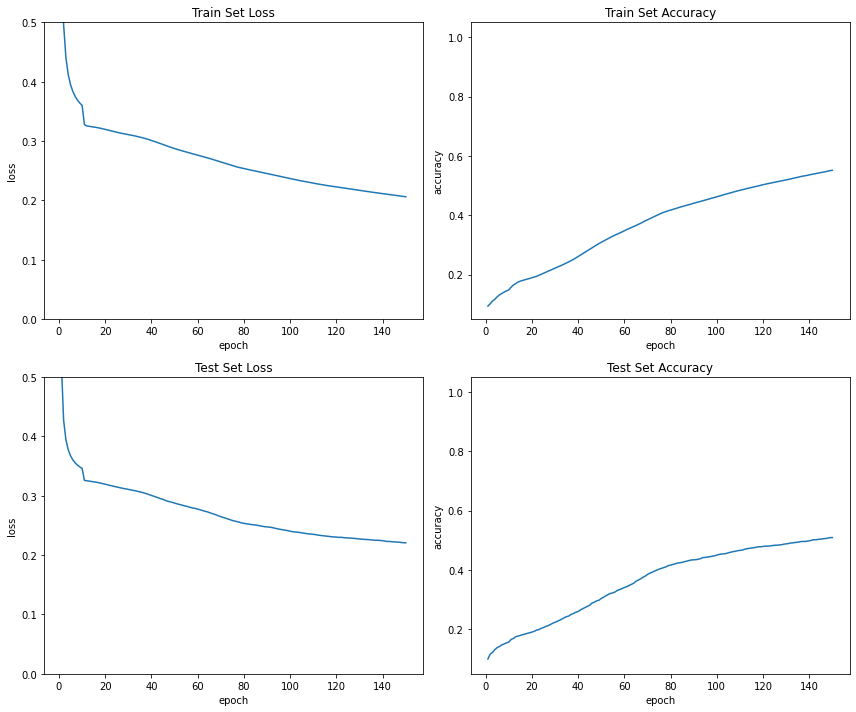

In [22]:
print(f'Elapsed time: {(model_3_3_elapsed_time):.2f} s')
plot_all_score_vs_epochs(model_3_3_history, 'model_3_3')

## Model 4
- batch normalization

In [23]:
def convolution_block_with_batch_normalization(n_filters, activation='relu'):
    return [tf_layers.Conv2D(n_filters, (3, 3), padding='same', activation=activation),
            tf_layers.BatchNormalization(),
            tf_layers.Conv2D(n_filters, (3, 3), padding='same', activation=activation),
            tf_layers.BatchNormalization(),
            tf_layers.MaxPooling2D(pool_size=(2, 2))]

model_4 = tf.keras.Sequential(layers=[
    tf.keras.Input(shape=(32, 32, 3)),
    tf_layers.Lambda(lambda x: x / 255), # normalization
    *convolution_block_with_batch_normalization(20),
    *convolution_block_with_batch_normalization(40),
    *convolution_block_with_batch_normalization(80),
    *convolution_block_with_batch_normalization(160),
    tf_layers.Flatten(),
    tf_layers.Dense(10, activation='softmax')
], name='model_4')

model_4_history, model_4_elapsed_time = compile_and_fit(model_4)

Epoch 1/150
196/196 [==============================] - 8s 35ms/step - loss: 0.3646 - categorical_accuracy: 0.2597 - val_loss: 0.4970 - val_categorical_accuracy: 0.1147
Epoch 2/150
196/196 [==============================] - 7s 34ms/step - loss: 0.2703 - categorical_accuracy: 0.3904 - val_loss: 0.3313 - val_categorical_accuracy: 0.2302
Epoch 3/150
196/196 [==============================] - 7s 33ms/step - loss: 0.2457 - categorical_accuracy: 0.4546 - val_loss: 0.2538 - val_categorical_accuracy: 0.4283
Epoch 4/150
196/196 [==============================] - 6s 33ms/step - loss: 0.2307 - categorical_accuracy: 0.4951 - val_loss: 0.2419 - val_categorical_accuracy: 0.4692
Epoch 5/150
196/196 [==============================] - 6s 33ms/step - loss: 0.2197 - categorical_accuracy: 0.5232 - val_loss: 0.2371 - val_categorical_accuracy: 0.4842
Epoch 6/150
196/196 [==============================] - 6s 33ms/step - loss: 0.2111 - categorical_accuracy: 0.5460 - val_loss: 0.2275 - val_categorical_accuracy:

196/196 [==============================] - 7s 35ms/step - loss: 0.0939 - categorical_accuracy: 0.8704 - val_loss: 0.1949 - val_categorical_accuracy: 0.6102
Epoch 50/150
196/196 [==============================] - 7s 35ms/step - loss: 0.0921 - categorical_accuracy: 0.8740 - val_loss: 0.1951 - val_categorical_accuracy: 0.6113
Epoch 51/150
196/196 [==============================] - 7s 34ms/step - loss: 0.0906 - categorical_accuracy: 0.8794 - val_loss: 0.1953 - val_categorical_accuracy: 0.6107
Epoch 52/150
196/196 [==============================] - 7s 35ms/step - loss: 0.0889 - categorical_accuracy: 0.8832 - val_loss: 0.1961 - val_categorical_accuracy: 0.6115
Epoch 53/150
196/196 [==============================] - 7s 34ms/step - loss: 0.0871 - categorical_accuracy: 0.8885 - val_loss: 0.1958 - val_categorical_accuracy: 0.6150
Epoch 54/150
196/196 [==============================] - 7s 35ms/step - loss: 0.0857 - categorical_accuracy: 0.8921 - val_loss: 0.1961 - val_categorical_accuracy: 0.6122

196/196 [==============================] - 7s 34ms/step - loss: 0.0368 - categorical_accuracy: 0.9881 - val_loss: 0.2220 - val_categorical_accuracy: 0.6166
Epoch 98/150
196/196 [==============================] - 7s 34ms/step - loss: 0.0360 - categorical_accuracy: 0.9888 - val_loss: 0.2234 - val_categorical_accuracy: 0.6165
Epoch 99/150
196/196 [==============================] - 7s 34ms/step - loss: 0.0351 - categorical_accuracy: 0.9899 - val_loss: 0.2227 - val_categorical_accuracy: 0.6177
Epoch 100/150
196/196 [==============================] - 6s 33ms/step - loss: 0.0347 - categorical_accuracy: 0.9902 - val_loss: 0.2249 - val_categorical_accuracy: 0.6163
Epoch 101/150
196/196 [==============================] - 6s 33ms/step - loss: 0.0337 - categorical_accuracy: 0.9915 - val_loss: 0.2249 - val_categorical_accuracy: 0.6170
Epoch 102/150
196/196 [==============================] - 6s 33ms/step - loss: 0.0331 - categorical_accuracy: 0.9922 - val_loss: 0.2258 - val_categorical_accuracy: 0.6

196/196 [==============================] - 6s 33ms/step - loss: 0.0148 - categorical_accuracy: 0.9997 - val_loss: 0.2574 - val_categorical_accuracy: 0.6154
Epoch 146/150
196/196 [==============================] - 6s 33ms/step - loss: 0.0144 - categorical_accuracy: 0.9998 - val_loss: 0.2572 - val_categorical_accuracy: 0.6116
Epoch 147/150
196/196 [==============================] - 7s 34ms/step - loss: 0.0142 - categorical_accuracy: 0.9998 - val_loss: 0.2594 - val_categorical_accuracy: 0.6116
Epoch 148/150
196/196 [==============================] - 7s 33ms/step - loss: 0.0140 - categorical_accuracy: 0.9998 - val_loss: 0.2594 - val_categorical_accuracy: 0.6137
Epoch 149/150
196/196 [==============================] - 6s 33ms/step - loss: 0.0136 - categorical_accuracy: 0.9998 - val_loss: 0.2594 - val_categorical_accuracy: 0.6172
Epoch 150/150
196/196 [==============================] - 6s 33ms/step - loss: 0.0134 - categorical_accuracy: 0.9999 - val_loss: 0.2606 - val_categorical_accuracy: 0

Elapsed time: 981.71 s


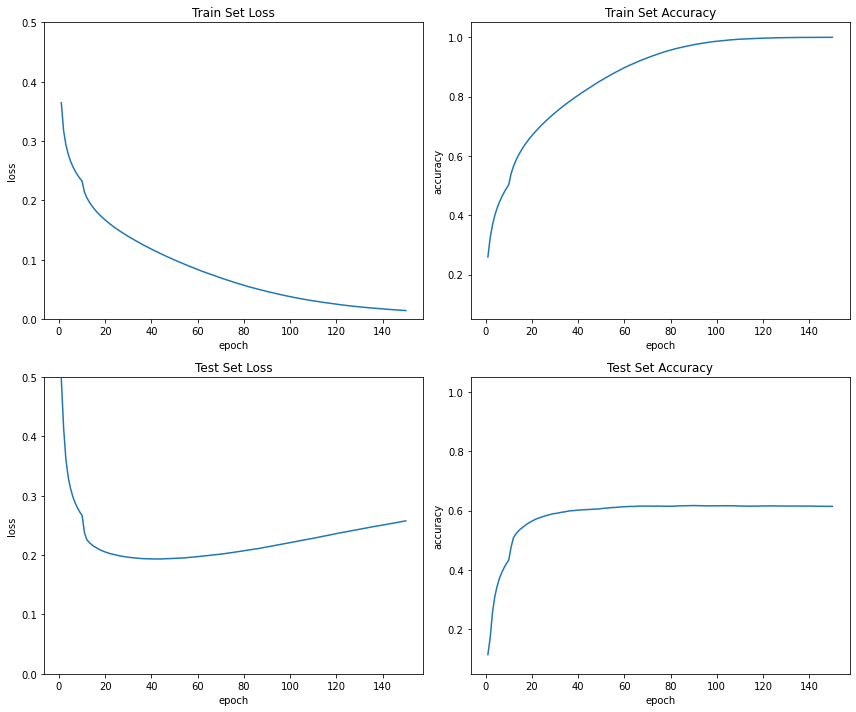

In [24]:
print(f'Elapsed time: {(model_4_elapsed_time):.2f} s')
plot_all_score_vs_epochs(model_4_history, 'model_4')

# Model 5

- dropout layer

In [25]:
def convolution_block_with_dropout(n_filters, dropout_rate, activation='relu'):
    return (convolution_block_with_batch_normalization(n_filters, activation) + 
            [tf_layers.Dropout(dropout_rate)])

model_5 = tf.keras.Sequential(layers=[
    tf.keras.Input(shape=(32, 32, 3)),
    tf_layers.Lambda(lambda x: x / 255), # normalization
    *convolution_block_with_dropout( 20, 0.1),
    *convolution_block_with_dropout( 40, 0.2),
    *convolution_block_with_dropout( 80, 0.3),
    *convolution_block_with_dropout(160, 0.4),
    tf_layers.Flatten(),
    tf_layers.Dense(10, activation='softmax')
], name='model_5')

model_5_history, model_5_elapsed_time = compile_and_fit(model_5)

Epoch 1/150
196/196 [==============================] - 8s 35ms/step - loss: 0.4881 - categorical_accuracy: 0.1640 - val_loss: 0.5509 - val_categorical_accuracy: 0.0989
Epoch 2/150
196/196 [==============================] - 7s 34ms/step - loss: 0.3675 - categorical_accuracy: 0.2458 - val_loss: 0.3864 - val_categorical_accuracy: 0.1601
Epoch 3/150
196/196 [==============================] - 7s 35ms/step - loss: 0.3329 - categorical_accuracy: 0.2839 - val_loss: 0.2984 - val_categorical_accuracy: 0.3312
Epoch 4/150
196/196 [==============================] - 7s 34ms/step - loss: 0.3126 - categorical_accuracy: 0.3160 - val_loss: 0.2836 - val_categorical_accuracy: 0.3865
Epoch 5/150
196/196 [==============================] - 7s 34ms/step - loss: 0.3007 - categorical_accuracy: 0.3381 - val_loss: 0.2791 - val_categorical_accuracy: 0.3902
Epoch 6/150
196/196 [==============================] - 7s 34ms/step - loss: 0.2912 - categorical_accuracy: 0.3574 - val_loss: 0.2737 - val_categorical_accuracy:

196/196 [==============================] - 7s 35ms/step - loss: 0.1964 - categorical_accuracy: 0.5894 - val_loss: 0.1894 - val_categorical_accuracy: 0.5830
Epoch 50/150
196/196 [==============================] - 7s 35ms/step - loss: 0.1949 - categorical_accuracy: 0.5915 - val_loss: 0.1812 - val_categorical_accuracy: 0.6114
Epoch 51/150
196/196 [==============================] - 7s 35ms/step - loss: 0.1932 - categorical_accuracy: 0.5926 - val_loss: 0.1858 - val_categorical_accuracy: 0.5908
Epoch 52/150
196/196 [==============================] - 7s 36ms/step - loss: 0.1927 - categorical_accuracy: 0.5961 - val_loss: 0.1882 - val_categorical_accuracy: 0.5864
Epoch 53/150
196/196 [==============================] - 7s 37ms/step - loss: 0.1911 - categorical_accuracy: 0.6007 - val_loss: 0.1777 - val_categorical_accuracy: 0.6118
Epoch 54/150
196/196 [==============================] - 7s 38ms/step - loss: 0.1902 - categorical_accuracy: 0.6042 - val_loss: 0.1800 - val_categorical_accuracy: 0.6068

196/196 [==============================] - 7s 34ms/step - loss: 0.1594 - categorical_accuracy: 0.6715 - val_loss: 0.1504 - val_categorical_accuracy: 0.6778
Epoch 98/150
196/196 [==============================] - 7s 34ms/step - loss: 0.1595 - categorical_accuracy: 0.6699 - val_loss: 0.1530 - val_categorical_accuracy: 0.6719
Epoch 99/150
196/196 [==============================] - 7s 35ms/step - loss: 0.1586 - categorical_accuracy: 0.6740 - val_loss: 0.1478 - val_categorical_accuracy: 0.6849
Epoch 100/150
196/196 [==============================] - 7s 35ms/step - loss: 0.1583 - categorical_accuracy: 0.6740 - val_loss: 0.1469 - val_categorical_accuracy: 0.6869
Epoch 101/150
196/196 [==============================] - 7s 35ms/step - loss: 0.1576 - categorical_accuracy: 0.6751 - val_loss: 0.1485 - val_categorical_accuracy: 0.6815
Epoch 102/150
196/196 [==============================] - 7s 35ms/step - loss: 0.1563 - categorical_accuracy: 0.6792 - val_loss: 0.1483 - val_categorical_accuracy: 0.6

196/196 [==============================] - 7s 36ms/step - loss: 0.1398 - categorical_accuracy: 0.7137 - val_loss: 0.1352 - val_categorical_accuracy: 0.7148
Epoch 146/150
196/196 [==============================] - 7s 37ms/step - loss: 0.1387 - categorical_accuracy: 0.7151 - val_loss: 0.1312 - val_categorical_accuracy: 0.7254
Epoch 147/150
196/196 [==============================] - 6s 30ms/step - loss: 0.1384 - categorical_accuracy: 0.7155 - val_loss: 0.1336 - val_categorical_accuracy: 0.7192
Epoch 148/150
196/196 [==============================] - 7s 35ms/step - loss: 0.1386 - categorical_accuracy: 0.7168 - val_loss: 0.1351 - val_categorical_accuracy: 0.7154
Epoch 149/150
196/196 [==============================] - 7s 36ms/step - loss: 0.1385 - categorical_accuracy: 0.7160 - val_loss: 0.1350 - val_categorical_accuracy: 0.7158
Epoch 150/150
196/196 [==============================] - 7s 35ms/step - loss: 0.1385 - categorical_accuracy: 0.7173 - val_loss: 0.1405 - val_categorical_accuracy: 0

Elapsed time: 1028.89 s


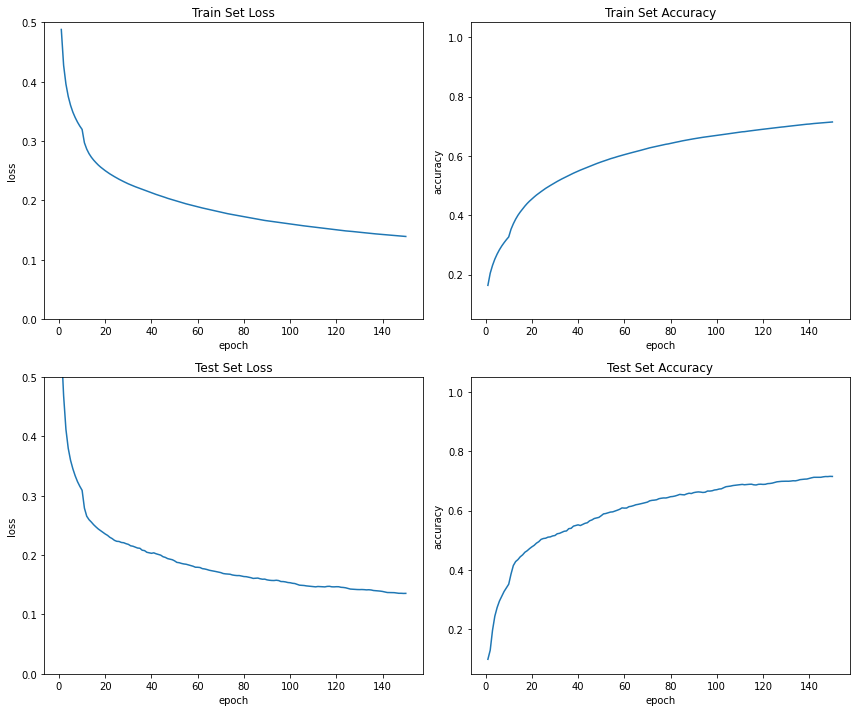

In [26]:
print(f'Elapsed time: {(model_5_elapsed_time):.2f} s')
plot_all_score_vs_epochs(model_5_history, 'model_5')

# GAP

## Model 6
- Global Average Pooling (GAP)

In [27]:
def convolution_block_with_opt_gap(n_filters, dropout_rate, gap=False, activation='relu'):
    if gap:
        pool_or_gap_layer = tf_layers.GlobalAveragePooling2D()
    else:
        pool_or_gap_layer = tf_layers.MaxPooling2D(pool_size=(2, 2))

    return [tf_layers.Conv2D(n_filters, (3, 3), padding='same', activation=activation),
            tf_layers.BatchNormalization(),
            tf_layers.Conv2D(n_filters, (3, 3), padding='same', activation=activation),
            tf_layers.BatchNormalization(),
            pool_or_gap_layer,
            tf_layers.Dropout(dropout_rate)]

model_6 = tf.keras.Sequential(layers=[
    tf_layers.Lambda(lambda x: x / 255), # normalization
    *convolution_block_with_opt_gap( 20, 0.1),
    *convolution_block_with_opt_gap( 40, 0.2),
    *convolution_block_with_opt_gap( 80, 0.3),
    *convolution_block_with_opt_gap(160, 0.4, gap=True),
    tf_layers.Flatten(),
    tf_layers.Dense(10, activation='softmax')
], name='model_6')

model_6_history, model_6_elapsed_time = compile_and_fit(model_6)
model_6.save_weights('./saved_weights/model_6_weights')

Epoch 1/150
196/196 [==============================] - 8s 35ms/step - loss: 0.6788 - categorical_accuracy: 0.1556 - val_loss: 0.6364 - val_categorical_accuracy: 0.1019
Epoch 2/150
196/196 [==============================] - 7s 34ms/step - loss: 0.5987 - categorical_accuracy: 0.2111 - val_loss: 0.5831 - val_categorical_accuracy: 0.1981
Epoch 3/150
196/196 [==============================] - 7s 34ms/step - loss: 0.5340 - categorical_accuracy: 0.2396 - val_loss: 0.5025 - val_categorical_accuracy: 0.2340
Epoch 4/150
196/196 [==============================] - 7s 35ms/step - loss: 0.4773 - categorical_accuracy: 0.2621 - val_loss: 0.4417 - val_categorical_accuracy: 0.2840
Epoch 5/150
196/196 [==============================] - 7s 34ms/step - loss: 0.4281 - categorical_accuracy: 0.2862 - val_loss: 0.3969 - val_categorical_accuracy: 0.2999
Epoch 6/150
196/196 [==============================] - 7s 34ms/step - loss: 0.3876 - categorical_accuracy: 0.3087 - val_loss: 0.3640 - val_categorical_accuracy:

196/196 [==============================] - 7s 34ms/step - loss: 0.1976 - categorical_accuracy: 0.5733 - val_loss: 0.2053 - val_categorical_accuracy: 0.5492
Epoch 50/150
196/196 [==============================] - 7s 34ms/step - loss: 0.1962 - categorical_accuracy: 0.5778 - val_loss: 0.1967 - val_categorical_accuracy: 0.5775
Epoch 51/150
196/196 [==============================] - 7s 34ms/step - loss: 0.1948 - categorical_accuracy: 0.5809 - val_loss: 0.1964 - val_categorical_accuracy: 0.5777
Epoch 52/150
196/196 [==============================] - 7s 35ms/step - loss: 0.1942 - categorical_accuracy: 0.5835 - val_loss: 0.2048 - val_categorical_accuracy: 0.5533
Epoch 53/150
196/196 [==============================] - 7s 34ms/step - loss: 0.1938 - categorical_accuracy: 0.5807 - val_loss: 0.2028 - val_categorical_accuracy: 0.5573
Epoch 54/150
196/196 [==============================] - 7s 34ms/step - loss: 0.1931 - categorical_accuracy: 0.5840 - val_loss: 0.1954 - val_categorical_accuracy: 0.5817

196/196 [==============================] - 7s 34ms/step - loss: 0.1668 - categorical_accuracy: 0.6497 - val_loss: 0.1670 - val_categorical_accuracy: 0.6437
Epoch 98/150
196/196 [==============================] - 7s 33ms/step - loss: 0.1658 - categorical_accuracy: 0.6511 - val_loss: 0.1702 - val_categorical_accuracy: 0.6372
Epoch 99/150
196/196 [==============================] - 7s 34ms/step - loss: 0.1655 - categorical_accuracy: 0.6516 - val_loss: 0.1688 - val_categorical_accuracy: 0.6378
Epoch 100/150
196/196 [==============================] - 7s 34ms/step - loss: 0.1653 - categorical_accuracy: 0.6531 - val_loss: 0.1689 - val_categorical_accuracy: 0.6392
Epoch 101/150
196/196 [==============================] - 7s 34ms/step - loss: 0.1647 - categorical_accuracy: 0.6553 - val_loss: 0.1705 - val_categorical_accuracy: 0.6352
Epoch 102/150
196/196 [==============================] - 7s 34ms/step - loss: 0.1643 - categorical_accuracy: 0.6550 - val_loss: 0.1675 - val_categorical_accuracy: 0.6

196/196 [==============================] - 7s 34ms/step - loss: 0.1484 - categorical_accuracy: 0.6927 - val_loss: 0.1493 - val_categorical_accuracy: 0.6855
Epoch 146/150
196/196 [==============================] - 7s 33ms/step - loss: 0.1484 - categorical_accuracy: 0.6926 - val_loss: 0.1474 - val_categorical_accuracy: 0.6906
Epoch 147/150
196/196 [==============================] - 6s 33ms/step - loss: 0.1479 - categorical_accuracy: 0.6941 - val_loss: 0.1491 - val_categorical_accuracy: 0.6885
Epoch 148/150
196/196 [==============================] - 6s 33ms/step - loss: 0.1476 - categorical_accuracy: 0.6963 - val_loss: 0.1482 - val_categorical_accuracy: 0.6904
Epoch 149/150
196/196 [==============================] - 7s 34ms/step - loss: 0.1472 - categorical_accuracy: 0.6969 - val_loss: 0.1517 - val_categorical_accuracy: 0.6792
Epoch 150/150
196/196 [==============================] - 7s 34ms/step - loss: 0.1468 - categorical_accuracy: 0.6968 - val_loss: 0.1540 - val_categorical_accuracy: 0

Elapsed time: 991.02 s


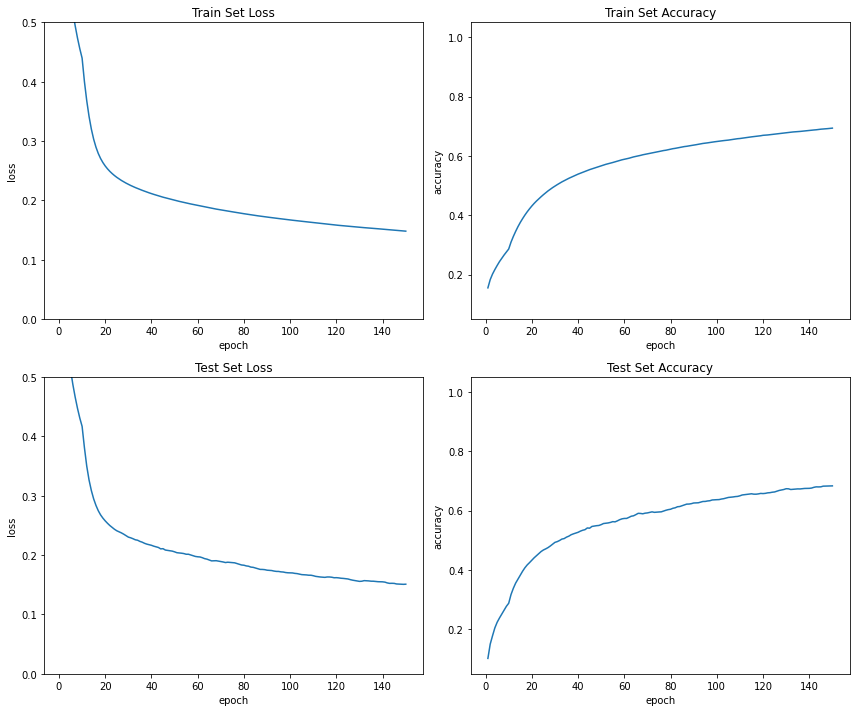

In [28]:
print(f'Elapsed time: {(model_6_elapsed_time):.2f} s')
plot_all_score_vs_epochs(model_6_history, 'model_6')

## New image
- Don-vip, [CC BY-SA 3.0](https://creativecommons.org/licenses/by-sa/3.0/)

128 x 96


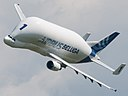

In [29]:
raw_image = Image.open('./Airbus_beluga.jpg')
print(f'{raw_image.width} x {raw_image.height}')
raw_image

In [30]:
resized_image = raw_image.resize((round(raw_image.width / 3), round(raw_image.height / 3)), Image.ANTIALIAS)
resized_image.width, resized_image.height

(43, 32)

In [31]:
image = np.array(resized_image)
print(model_6.predict(np.array([image])))
print('Predicted class:', np.argmax(model_6.predict(np.array([image]))))

[[9.9584830e-01 1.1717505e-03 1.3922680e-04 1.1981234e-05 3.4806333e-05
  1.3559502e-05 3.9983479e-05 1.4039820e-05 2.7191711e-03 7.1652603e-06]]
Predicted class: 0
